# Modelos lineales y regularizacion

In [1]:
import numpy as np

n=100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

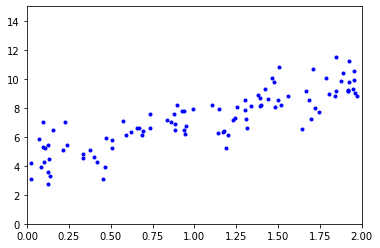

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((n, 1)), X] # add x0 = 1 to each instance
# w_hat 
, = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
X_b.shape

(100, 2)

In [ ]:
print(w_hat)

[[4.04671292]
 [2.9927079 ]]


In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

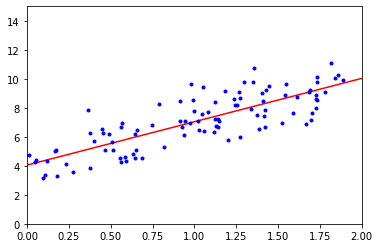

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

Coeficientes Sklearn :  [4.04671292] [[2.9927079]]
Coeficientes Manual :  [[4.04671292]
 [2.9927079 ]]


# Regularizacion

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.sin(X) + np.random.randn(100, 1)

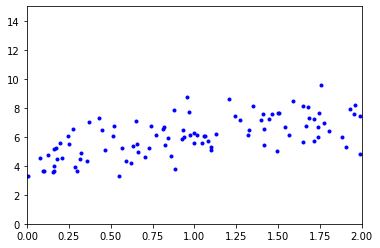

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

In [ ]:
X_p[0]

array([1.        , 1.75705675, 3.08724843])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
r2=lin_reg.score(X, y)
print('Coeficiente Determinacion :',r2)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficiente Determinacion : 0.39007262277083776
Coeficientes Sklearn :  [4.56530569] [[1.48675753]]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficiente Determinacion :',r2)

Coeficientes Sklearn :  [4.02462452] [[ 0.          3.1073279  -0.80935799]]
Coeficiente Determinacion : 0.42051678772550866


In [ ]:
y_predict=lin_reg.predict(X_p)

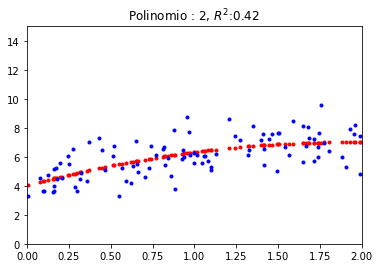

In [ ]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.axis([0, 2, 0, 15])
plt.show()

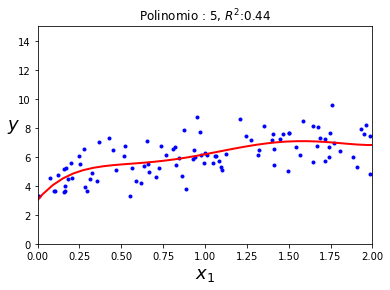

In [ ]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

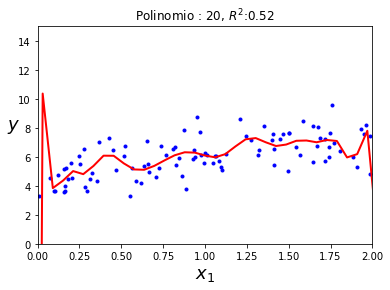

In [ ]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [ ]:
print(X_p.shape)

(100, 21)


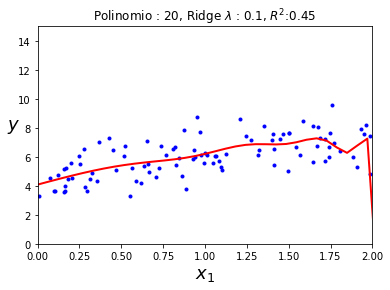

In [ ]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.16127105687363, tolerance: 0.01892441780847124
  positive)


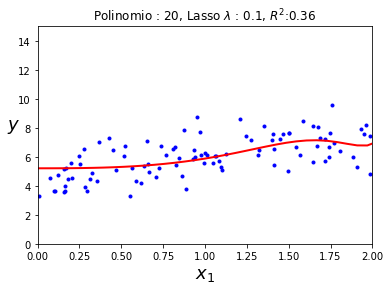

In [ ]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

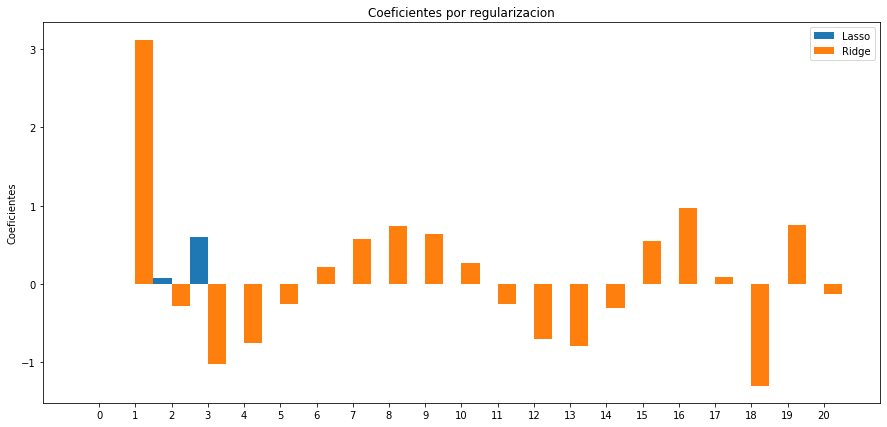

In [ ]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge_reg.coef_[0], width, label='Ridge')
#rects3 = ax.bar(x + width/2, lin_reg.coef_[0], width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos' a partir de las distintas vacunas y las medidas administradas en Chile.
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [3]:
import pandas as pd

data_cases = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv",
    keep_default_na=False,
    na_values=[""],
)

In [ ]:
for i,c in enumerate(data_cases.columns):
  print(i,c)

0 date
1 location_key
2 new_confirmed
3 new_deceased
4 new_recovered
5 new_tested
6 cumulative_confirmed
7 cumulative_deceased
8 cumulative_recovered
9 cumulative_tested


In [4]:
data_cases.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [9]:
data_cases.groupby('location_key')

In [10]:
data_vaccines = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv",
    keep_default_na=False,
    na_values=[""],
)

In [13]:
data_vaccines[data_vaccines.location_key=='CL'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_persons_vaccinated,295.0,5.461384e+04,6.153611e+04,0.0,1892.00,29527.0,88545.0,272448.0
cumulative_persons_vaccinated,296.0,8.861794e+06,5.383216e+06,420.0,4164577.25,9629610.0,13963041.0,16111504.0
new_persons_fully_vaccinated,275.0,5.223737e+04,6.365403e+04,0.0,951.00,22431.0,88515.5,272515.0
cumulative_persons_fully_vaccinated,276.0,7.753487e+06,5.171637e+06,1032.0,3073859.25,8015835.0,12745556.5,14366309.0
new_vaccine_doses_administered,295.0,1.156883e+05,1.052193e+05,0.0,4489.50,130336.0,190658.0,430397.0
cumulative_vaccine_doses_administered,296.0,1.638490e+07,1.113210e+07,420.0,4907170.75,17357514.5,26045410.0,34128477.0
new_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


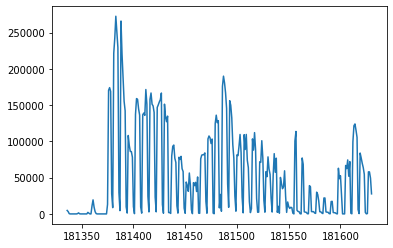

In [59]:
data_vaccines[data_vaccines.location_key=='CL']['new_persons_vaccinated'].plot()

In [14]:
data_response = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

In [19]:
data_response[data_response.location_key=='CL'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_closing,657.0,2.462709e+00,9.903008e-01,0.0,2.00,3.00,3.00,3.000000e+00
workplace_closing,657.0,2.477930e+00,9.953627e-01,0.0,2.00,3.00,3.00,3.000000e+00
cancel_public_events,657.0,1.744292e+00,6.475106e-01,0.0,2.00,2.00,2.00,2.000000e+00
restrictions_on_gatherings,657.0,3.135464e+00,1.231537e+00,0.0,3.00,3.00,4.00,4.000000e+00
public_transport_closing,657.0,1.010654e+00,7.914611e-01,0.0,0.00,1.00,2.00,2.000000e+00
stay_at_home_requirements,657.0,2.345510e+00,1.076756e+00,0.0,2.00,3.00,3.00,3.000000e+00
restrictions_on_internal_movement,657.0,1.689498e+00,7.248397e-01,0.0,2.00,2.00,2.00,2.000000e+00
international_travel_controls,657.0,2.773212e+00,1.297987e+00,0.0,2.00,3.00,4.00,4.000000e+00
income_support,657.0,1.389650e+00,8.210731e-01,0.0,1.00,2.00,2.00,2.000000e+00
debt_relief,657.0,1.254186e+00,8.541068e-01,0.0,0.00,2.00,2.00,2.000000e+00


In [34]:
cases_chile=data_cases.loc[data_cases.location_key=='CL']
vaccines_chile=data_vaccines.loc[data_vaccines.location_key=='CL']
response_chile=data_response.loc[data_response.location_key=='CL']

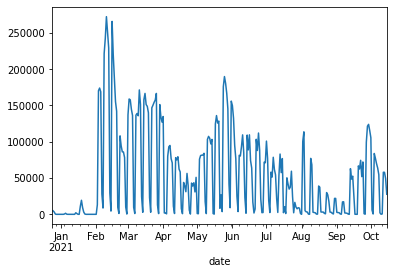

In [60]:
vaccines_chile['new_persons_vaccinated'].plot()

In [36]:
cases_chile['date']=pd.to_datetime(cases_chile['date'],format='%Y/%m/%d')
vaccines_chile['date']=pd.to_datetime(vaccines_chile['date'],format='%Y/%m/%d')
response_chile['date']=pd.to_datetime(response_chile['date'],format='%Y/%m/%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
cases_chile.set_index('date',inplace=True)
vaccines_chile.set_index('date',inplace=True)
response_chile.set_index('date',inplace=True)

In [43]:
df_chile=pd.concat([cases_chile,vaccines_chile,response_chile])

In [62]:
df_chile=pd.merge(cases_chile,vaccines_chile, left_index=True, right_index=True)

In [64]:
df_chile=pd.merge(df_chile,response_chile, left_index=True, right_index=True)

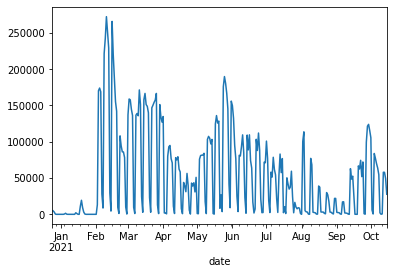

In [65]:
df_chile['new_persons_vaccinated'].plot()

In [66]:
y=df_chile['new_confirmed']
X=df_chile[['new_persons_vaccinated','school_closing','workplace_closing']]

In [68]:
X=X[X['school_closing']>0]
X.fillna(0,inplace=True)

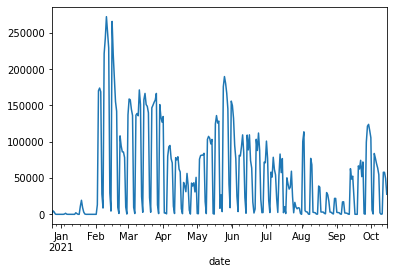

In [69]:
X['new_persons_vaccinated'].plot()

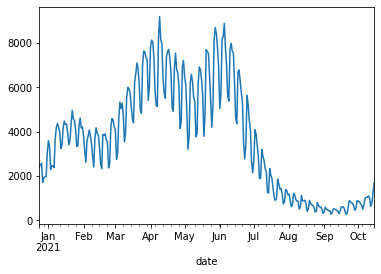

In [70]:
y.plot()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


regr_1 = DecisionTreeRegressor(max_depth=5)

regr_1 = regr_1.fit(X_train,y_train)


In [73]:
y_pred=regr_1.predict(X_test)

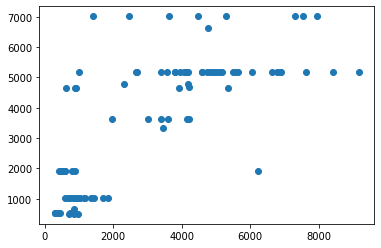

In [74]:
plt.scatter(y_test,y_pred)